In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import seaborn as sns
# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


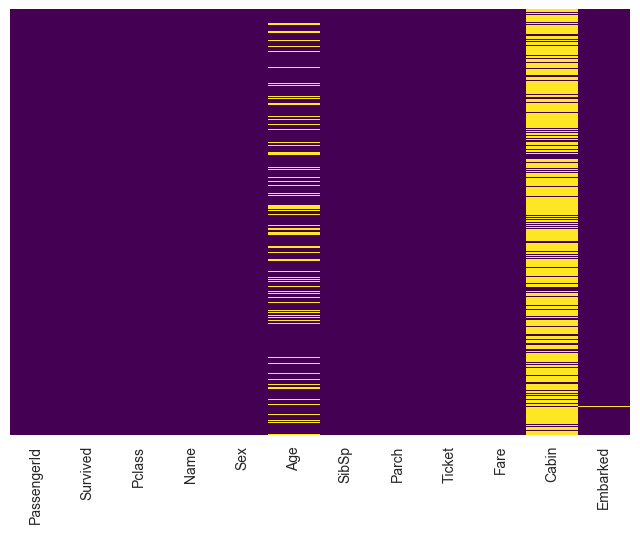

In [2]:
sns.heatmap(full_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [4]:
#drop Cabin - too much missing data
full_data.drop('Cabin', axis=1, inplace=True)

In [5]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
#drop missing values
full_data.dropna(inplace=True)

In [9]:
#create dummies for Sex
sex=pd.get_dummies(full_data['Sex'], drop_first=True)
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [10]:
#create dummies for Embarked
embark=pd.get_dummies(full_data['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [22]:
#drop redundant columns
full_data=pd.concat([full_data, sex, embark], axis=1)
full_data.head()
full_data.drop(['male','male','Q', 'Q', 'S', 'S'], axis=1, inplace=True)
full_data.head()
full_data=pd.concat([full_data, sex, embark], axis=1)
full_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [23]:
#define feature and label
X=full_data.drop('Survived', axis=1)
y=full_data['Survived']

In [36]:
#train & test 
# logistic regression to classify >80%

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#train the algorithm
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
# predictions
predictions = lr.predict(X_test)

# check for accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions)) 


             precision    recall  f1-score   support

          0       0.80      0.88      0.84        84
          1       0.80      0.68      0.73        59

avg / total       0.80      0.80      0.79       143

